In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
# import
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/ai4i2020.csv')

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# 개요 및 null값 확인
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [ ]:
df.isnull().value_counts()

UDI    Product ID  Type   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF    HDF    PWF    OSF    RNF  
False  False       False  False                False                    False                   False        False            False            False  False  False  False  False    10000
dtype: int64

In [ ]:
# 전처리
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# 켈빈(K) 온도에서 섭씨(C) 온도로
df['Air temperature'] = df['Air temperature'] - 273.15
df['Process temperature'] = df['Process temperature'] - 273.15
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# 한글화
df.rename(columns={'UDI':'고유 식별자',
                   'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature':'기온',
                   'Process temperature':'공정 온도',
                   'Rotational speed':'회전 속도',
                   'Torque':'Torque',
                   'Tool wear':'공구 마모',
                   'Machine failure':'실패 여부',
                   'TWF':'실패 요인 : 공구 마모',
                   'HDF':'실패 요인 : 열 방산',
                   'PWF':'실패 요인 : 전력 이상',
                   'OSF':'실패 요인 : 제품 변형',
                   'RNF':'실패 요인 : 알 수 없음'},inplace=True)
df

,고유 식별자,제품 ID,제품 유형,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# Type과 Machine Failure 상관관계 비교
df['제품 유형'].value_counts()

L    6000
M    2997
H    1003
Name: 제품 유형, dtype: int64

In [ ]:
df[df['실패 여부']==1]['제품 유형'].value_counts()

L    235
M     83
H     21
Name: 제품 유형, dtype: int64

Text(0.5, 1.0, '제품 유형')

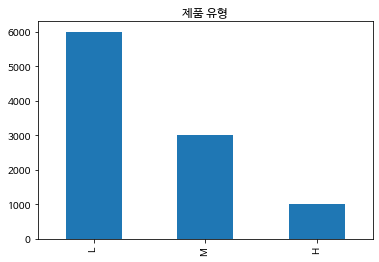

In [ ]:
df['제품 유형'].value_counts().plot.bar()
plt.title('제품 유형')

Text(0.5, 1.0, '실패 제품 유형')

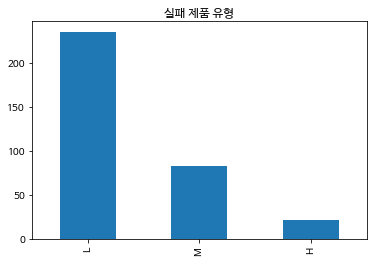

In [ ]:
df[df['실패 여부']==1]['제품 유형'].value_counts().plot.bar()
plt.title('실패 제품 유형')

In [ ]:
# Air Temperature와 HDF 상관관계 비교
df['기온'].mean()

26.85493000000002

In [ ]:
df[df['실패 요인 : 열 방산']==1]['기온'].mean()

29.410869565217414

In [ ]:
df_heat1 = df[['기온', '실패 요인 : 열 방산']]
df_heat2 = df[df['실패 요인 : 열 방산']==1][['기온', '실패 요인 : 열 방산']]

Text(0.5, 1.0, '전체 기온 상자그래프')

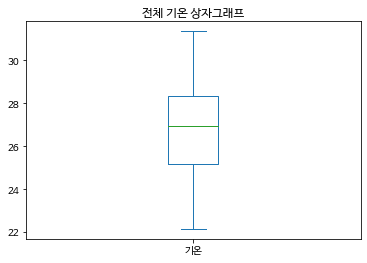

In [ ]:
df_heat1['기온'].plot.box()
plt.title('전체 기온 상자그래프')

Text(0.5, 1.0, '실패시 기온 상자그래프')

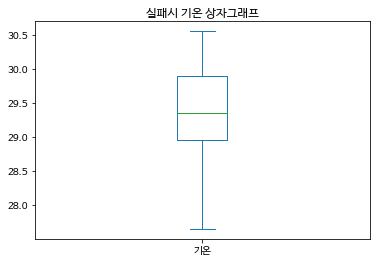

In [ ]:
df_heat2['기온'].plot.box()
plt.title('실패시 기온 상자그래프')

Text(0.5, 1.0, '회전 속도와 전력 이상 요인과의 관계')

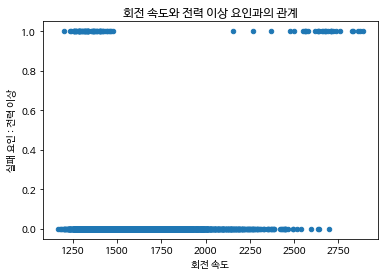

In [ ]:
# Rotational speed와 PWF의 상관관계
df.plot(x='회전 속도', y='실패 요인 : 전력 이상', kind='scatter')
plt.title('회전 속도와 전력 이상 요인과의 관계')

Text(0.5, 1.0, 'Torque와 전력 이상 요인과의 관계')

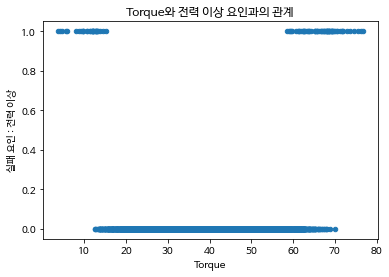

In [ ]:
# Torque와 PWF의 상관관계
df.plot(x='Torque', y='실패 요인 : 전력 이상', kind='scatter')
plt.title('Torque와 전력 이상 요인과의 관계')

In [ ]:
# Tool wear와 TWF의 상관관계
df['공구 마모'].mean()

107.951

In [ ]:
df[df['실패 요인 : 공구 마모']==1]['공구 마모'].mean()

216.3695652173913

In [ ]:
df

,고유 식별자,제품 ID,제품 유형,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0


In [ ]:
# 1. 제품 유형 중에는 상대적인 비율로는 H는 실패가 적고, L이 실패가 많다.

# 2. 일반적인 기온의 평균보다 열 방산에 의한 실패가 나타났을 때의 기온의 평균이 더 높게 나타났다. (즉, 기온이 높을 수록 열 방산에 의한 실패 확률이 늘어나는 듯 보인다.)

# 3. 그래프를 볼 때, 회전속도나 Torque가 극단값에 있을 때 주로 전력 이상에 의한 실패가 나타나는 듯 보인다.

# 4. 공구 마모에 의한 실패는 절대적이다.